# Definimos las librerias que vamos a utilizar y la imagen a procesar

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import match_template
from PIL import Image

ImagenTotal = np.asarray(Image.open('Input\Aplicado.png'))

# Seleccion de puntos a caracteristicos

<IPython.core.display.Javascript object>


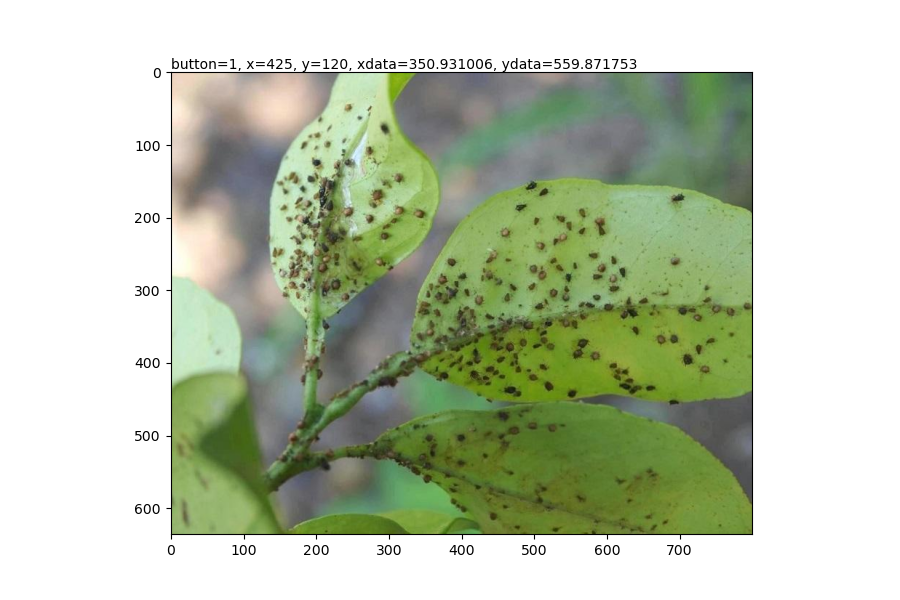

In [2]:
#Seleccion de puntos caracteristicos dentro de la imagen tomada
puntoscaracteristicos = []

fig = plt.figure(figsize=(9, 6)) #Genera un plot de tipo figura y agina el tamaño
ax = fig.add_subplot(111)        #A
ax.imshow(ImagenTotal, cmap=plt.cm.gray)
text=ax.text(0,0, "", va="bottom", ha="left")

#Funcion para la toma de puntos de interes, genera un evento que adiciona los puntos.
def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    puntoscaracteristicos.append([event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Conteo de puntos guia

In [4]:
# Conteo de puntos seleccionados como caracteristicos
len(puntoscaracteristicos)

12

# Re-seleccion, si asi se desea y muestra los puntos actuales

<IPython.core.display.Javascript object>


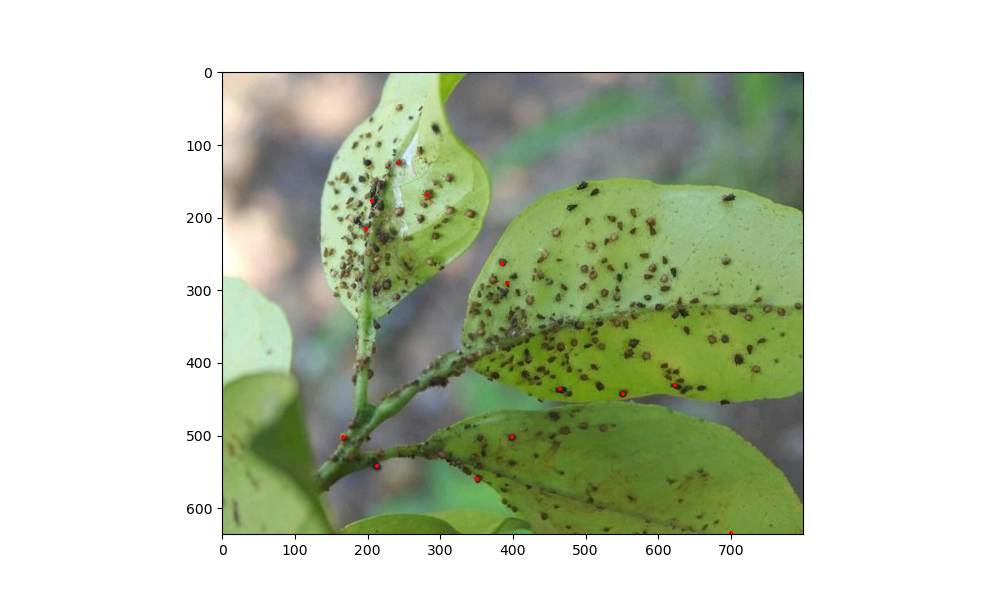

In [6]:
#Sin dejar de lado los puntos caracteristicos, es posible visualizar los puntos ya seleccionados y tomar mas
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.imshow(ImagenTotal, cmap=plt.cm.gray)
ax.scatter([x[0] for x in puntoscaracteristicos],[y[1] for y in puntoscaracteristicos],c='red', marker='+', s=8)
text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    puntoscaracteristicos.append([event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Volvemos a realizar el conteo de puntos

In [19]:
# amount of points clicked
len(puntoscaracteristicos)

0

# Muestra los puntos de interes de forma individual 

<IPython.core.display.Javascript object>


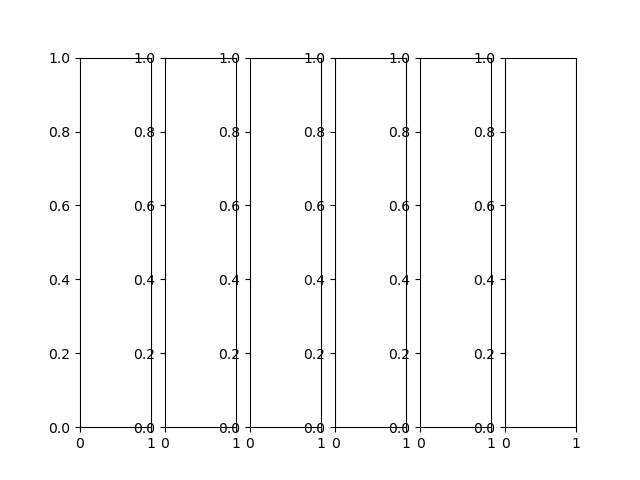

In [20]:
#show all the points of interest, please be careful to have a complete image, otherwise the model wont run
fig, ax = plt.subplots(len(puntoscaracteristicos)//6+1, 6)
i = 0
for item in puntoscaracteristicos:
    xinteres = int(item[0])
    yinteres = int(item[1])
    radio = 20
    ax[i//6,i-i//6*6].imshow(ImagenTotal)
    ax[i//6,i-i//6*6].plot(xinteres,yinteres,color='red', linestyle='dashed', marker='+',
     markerfacecolor='blue', markersize=8)
    ax[i//6,i-i//6*6].set_xlim(xinteres-radio,xinteres+radio)
    ax[i//6,i-i//6*6].set_ylim(yinteres-radio,yinteres+radio)
    ax[i//6,i-i//6*6].axis('off')
    ax[i//6,i-i//6*6].set_title(i)
    i+=1

# Seleccione los puntos que realmente no sean caracteristicos, o pase

In [21]:
#En caso de que el punto no sea caracteristico, quite el "#" en la siguiente linea y coloque el numero que no desea considerar.
#del puntoscaracteristicos[13]
len(puntoscaracteristicos)

0

# Busca los patrones similares presentes en la imagen procesada

In [22]:
#Crea una numeracion y distincion por color a los puntos de la imagen que son similares a los puntos caracteristicos.
listaresultados = []
for punto in puntoscaracteristicos:
    xinteres = int(punto[0])
    yinteres = int(punto[1])
    radio=10
    imagenband = ImagenTotal[:,:,0]
    templateband = ImagenTotal[yinteres-radio:yinteres+radio,xinteres-radio:xinteres+radio,0]
    result= match_template(imagenband, templateband)
    result = np.where(result>0.85)
    listaresultados.append(result)

# Situa los patrones similares sobre la imagen y diferencia por colores

<IPython.core.display.Javascript object>


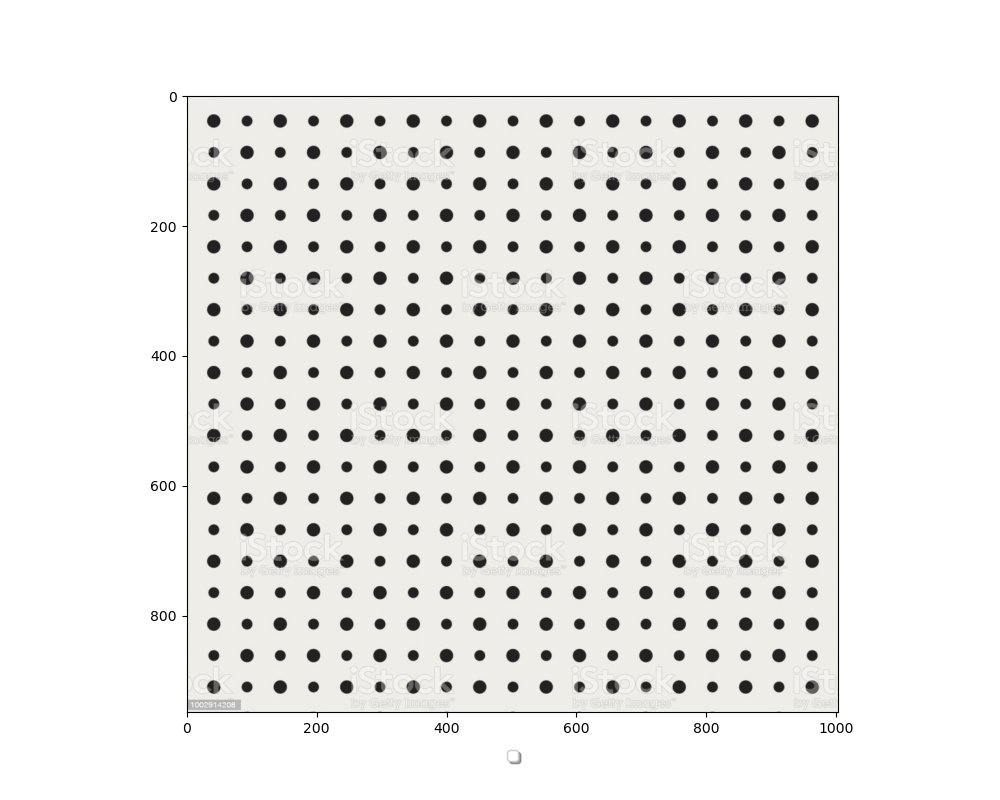

No handles with labels found to put in legend.


In [23]:
from itertools import cycle
cycol = cycle('bgrcmk')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

i = 1
for lista in listaresultados:
    ax.plot(lista[1],lista[0], '.', linewidth=0, markerfacecolor=next(cycol), label=i)
    i+=1
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.imshow(ImagenTotal[radio:-radio,radio:-radio,:])

# Conglomerado de datos

In [24]:
datalist = [np.asarray(pares).T for pares in listaresultados]
print(len(datalist))
datalist = np.vstack(datalist)
print(datalist)

0


ValueError: need at least one array to concatenate

# Aplicacion del algoritmo de Birch

In [25]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=10000, n_clusters=None, threshold=10, compute_labels=True)
brc.fit(datalist)
puntosbirch = brc.subcluster_centers_
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(puntosbirch[:,[1]],puntosbirch[:,[0]], marker='+',color='red')
ax.imshow(ImagenTotal[radio:-radio,radio:-radio,:])

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.